In [14]:
import numpy as np
import pandas as pd
import sklearn

import os
import re
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [48]:
# create dict of data_frames dfs = {'cs': pd.DataFrame(), 'math': ..., etc.}

dir_ = "arXivMeta/arXivMeta_completed/"

dfs = {}

for file in os.listdir(dir_):
    cat = re.search(r'arXivMeta_(.+?)_', file).group(1)
    file_path = os.path.join(dir_, file)
    
    if cat not in dfs:
        dfs[cat] = [file_path]
    else:
        dfs[cat].append(file_path)

def getdf(file_list):
    dfs = [pd.read_csv(file, delimiter='\t') for file in file_list]
    return pd.concat(dfs)

dfs = {cat: getdf(cat_files) for (cat, cat_files) in dfs.items()}

In [62]:
# quickly check if there are no duplicates (at least by 'id')

[(cat, 0 == len(df.id) - len(df.id.unique())) for (cat,df) in dfs.items()]

[('cs', True),
 ('math', True),
 ('physics', True),
 ('q-bio', True),
 ('q-fin', True),
 ('stat', True)]

In [61]:
# now we have for example

dfs['math'][:3]

,id,prim_cat,sec_cats,title,abstract
0,0704.0073,math,math.AG,A transcendental approach to Koll\'ar's inject...,We treat Koll\'ar's injectivity theorem from...
1,0704.0095,math,math.GR math.DG,Geometry of Locally Compact Groups of Polynomi...,We get asymptotics for the volume of large b...
2,0704.0273,math,math-ph math.GT math.MP,Dimers on surface graphs and spin structures. II,"In a previous paper, we showed how certain o..."


In [67]:
# get primary_categories (prim_cat) and text (title+abstract) only

def strip(df):
    df_2 = pd.concat([df.title + " " + df.abstract, df.prim_cat], axis=1)
    df_2.columns = ['text', 'label']
    return df_2

    
# df = pd.concat([strip(df) for df in dfs]).sample(frac=1)
bare_dfs = {cat: strip(df) for (cat, df) in dfs.items()}

In [85]:
with pd.option_context('display.max_colwidth', 100):
    display(bare_dfs['math'][:3])

,text,label
0,A transcendental approach to Koll\'ar's injectivity theorem We treat Koll\'ar's injectivity th...,math
1,Geometry of Locally Compact Groups of Polynomial Growth and Shape of\r\n Large Balls We get a...,math
2,"Dimers on surface graphs and spin structures. II In a previous paper, we showed how certain or...",math


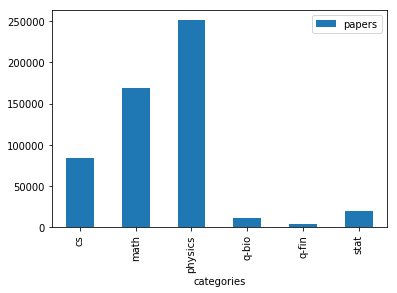

In [137]:
record_counts_tr = np.array([[cat, len(df)] for (cat, df) in bare_dfs.items()]).transpose()
record_counts_df = pd.DataFrame({'categories': record_counts_tr[0], 'papers': record_counts_tr[1]})

record_counts_df.set_index('categories').astype('int').plot.bar()
plt.show()

In [6]:
ids_with_cats_ugly = df[['id', 'sec_cats']].set_index('id').sec_cats.str.split(expand=True).stack()
print(ids_with_cats_ugly[:10])

id_with_cats = pd.get_dummies(ids_with_cats_ugly).groupby(level=0).sum()
id_with_cats[:10]

id          
0704.1390  0              q-bio.CB
0704.2200  0              q-bio.MN
0704.2547  0              q-bio.BM
           1    cond-mat.stat-mech
0704.3005  0              q-bio.NC
           1       cond-mat.dis-nn
0704.3226  0              q-bio.QM
           1              q-bio.MN
0704.3321  0              q-bio.MN
0704.3724  0              q-bio.NC
dtype: object


,adap-org,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.SR,chao-dyn,cond-mat,cond-mat.dis-nn,cond-mat.mes-hall,...,q-bio.TO,q-fin.GN,q-fin.RM,quant-ph,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT,stat.TH
id,,,,,,,,,,,,,,,,,,,,,
0704.1390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0704.2200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0704.2547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0704.3005,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0704.3226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0704.3321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0704.3724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0705.3869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0706.0001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
len(id_with_cats.columns.unique())

124

In [30]:
for column in id_with_cats:
    print(column)

adap-org
astro-ph.CO
astro-ph.EP
astro-ph.GA
astro-ph.HE
astro-ph.SR
chao-dyn
cond-mat
cond-mat.dis-nn
cond-mat.mes-hall
cond-mat.mtrl-sci
cond-mat.other
cond-mat.quant-gas
cond-mat.soft
cond-mat.stat-mech
cs.AI
cs.AR
cs.CC
cs.CE
cs.CG
cs.CL
cs.CR
cs.CV
cs.CY
cs.DB
cs.DC
cs.DL
cs.DM
cs.DS
cs.ET
cs.FL
cs.GR
cs.GT
cs.HC
cs.IR
cs.IT
cs.LG
cs.LO
cs.MA
cs.MM
cs.MS
cs.NA
cs.NE
cs.OH
cs.PF
cs.PL
cs.RO
cs.SD
cs.SE
cs.SI
cs.SY
hep-lat
hep-ph
hep-th
math-ph
math.AC
math.AG
math.AP
math.AT
math.CA
math.CO
math.CT
math.DG
math.DS
math.FA
math.GT
math.HO
math.IT
math.LO
math.MG
math.MP
math.NA
math.OC
math.PR
math.RA
math.RT
math.SP
math.ST
nlin.AO
nlin.CD
nlin.CG
nlin.PS
nlin.SI
nucl-th
patt-sol
physics.ao-ph
physics.atm-clus
physics.atom-ph
physics.bio-ph
physics.chem-ph
physics.class-ph
physics.comp-ph
physics.data-an
physics.ed-ph
physics.flu-dyn
physics.gen-ph
physics.geo-ph
physics.hist-ph
physics.ins-det
physics.med-ph
physics.optics
physics.pop-ph
physics.soc-ph
physics.space-ph
q-bio
q-bio

In [13]:
for i in range(id_with_cats.shape[0]):
    print(id_with_cats.iloc[0].sum())

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
